IMPORTING THE LIBRARIES

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

import pickle
%matplotlib inline

READING THE FILE

In [2]:
df=pd.read_csv("../Collect dataset/autos.csv", header=0, sep=',', encoding='Latin1',)

READ DATASET

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


READING THE SHAPE(no. of rows, no. of columns)

In [4]:
df.shape

(371528, 20)

DROPPING THE COLUMNS CONTAINING NULL VALUES

In [5]:
df = df.dropna()

CLEANING THE DATASET

In [6]:
df.seller.value_counts()

privat        260954
gewerblich         2
Name: seller, dtype: int64

In [7]:
df.offerType.value_counts()

Angebot    260952
Gesuch          4
Name: offerType, dtype: int64

In [8]:
df[(df['powerPS'] < 50) | (df['powerPS'] > 900)]['powerPS'].unique()


array([    0,    45,    41,    44,    39,    23,  1398,    48,    33,
          43,   953,    46,    26,    40,    34,  1753, 10317,    47,
          18,    15,   952,    37,    22,    42,  2729,    21,  1240,
        1900,    29,    38,    14, 10520,    27,    20,    11,    25,
          12,    35,    49,  1659,     4,     1,     5,    17,  1625,
          24,    16,     9,    30,     8,     7,    19,    28, 17322,
        1360,  3750,  1062,    10,  1024, 11530,  1796,  1780,  2005,
        1800,  1399,  1500,    32,  1001,  1436,  1405,  1288,  1055,
        6226,  1115,  1223,  1968,  1920,  4400,     6,  1164, 11635,
        1703,  1910,    31,  1403,  5575,  1000,  4700,  1600,  2331,
          36,  6006,  5815,  1781,  1506, 15020,  5867,  1598, 17410,
        1363,  1054,  1700, 15001,  6045,     2,  6010,   903,  2000,
        1521,  1998,  1230,  8259,   909,  1595, 17700, 11011,  1199,
        1162, 15033, 16312, 20000,   950,  1021, 11620, 13636,  9710,
        2009,  6062,

In [9]:
df[(df['yearOfRegistration'] < 1949) | (df['yearOfRegistration'] > 2017)]['yearOfRegistration'].unique()

array([1945, 1937, 1936, 1948, 1932, 1931, 2018, 1942, 1910, 1923, 1930,
       1943, 1938, 1941, 1934, 1919, 1939, 1929, 1933, 1947])

In [10]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [11]:
df=df.drop('seller',axis=1)

In [12]:
df.shape

(260956, 19)

In [13]:
df=df.drop('offerType',axis=1)

In [14]:
df.shape

(260956, 18)

In [15]:
df=df[(df.powerPS > 50) & (df.powerPS < 900)]

In [16]:
df.shape

(244748, 18)

In [17]:
df = df[(df.yearOfRegistration >= 1950) & (df.yearOfRegistration < 2018)]

In [18]:
df.shape

(244731, 18)

In [19]:
df = df[(df.price >= 100) & (df.price <= 150000)]


DROPPING THE UNWANTED COLUMNS

In [20]:
df.drop(['name', 'abtest', 'dateCrawled', 'nrOfPictures', 'lastSeen',
         'postalCode','dateCreated'], axis='columns',inplace=True)

In [21]:
df.shape

(241400, 11)

In [22]:
final_df = df.copy()

DROPPING THE DUPLICATE COLUMNS

In [23]:
final_df = final_df.drop_duplicates ([ 'price', 'vehicleType', 'yearOfRegistration'
                                  ,'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType'
                                  ,'notRepairedDamage'])

REPLACING THE UNKNOWN VALUES WITH KNOWN VALUES

In [24]:
final_df['gearbox'].unique()

array(['manuell', 'automatik'], dtype=object)

In [25]:
final_df['fuelType'].unique()

array(['benzin', 'diesel', 'lpg', 'andere', 'hybrid', 'cng', 'elektro'],
      dtype=object)

In [26]:
final_df['vehicleType'].unique()

array(['kleinwagen', 'limousine', 'cabrio', 'kombi', 'suv', 'bus',
       'coupe', 'andere'], dtype=object)

In [27]:
final_df['notRepairedDamage'].unique()

array(['nein', 'ja'], dtype=object)

In [28]:
final_df.gearbox.replace(('manuell', 'automatik'), ('manual', 'automatic'), inplace=True)
final_df.fuelType.replace(('benzin', 'andere', 'elektro'), ('petrol', 'others', 'electric'), inplace=True)
final_df.vehicleType.replace(('kleinwagen', 'cabrio', 'kombi', 'andere'), 
                           ('small car', 'convertible', 'combination', 'others'), inplace=True)
final_df.notRepairedDamage.replace(('ja', 'nein'), ('Yes', 'No'),inplace=True)


FILLING THE NA VALUES

In [29]:
final_df['notRepairedDamage'].fillna(value='not-declared', inplace=True)
final_df[ 'fuelType'].fillna(value='not-declared', inplace=True)
final_df[ 'gearbox'].fillna(value='not-declared', inplace=True)
final_df[ 'vehicleType'].fillna (value='not-declared', inplace=True)
final_df['model'].fillna(value='not-declared',inplace=True)


In [31]:
final_df.to_csv("preprocessed_final_data.csv")


VISUALIZING THE DATA

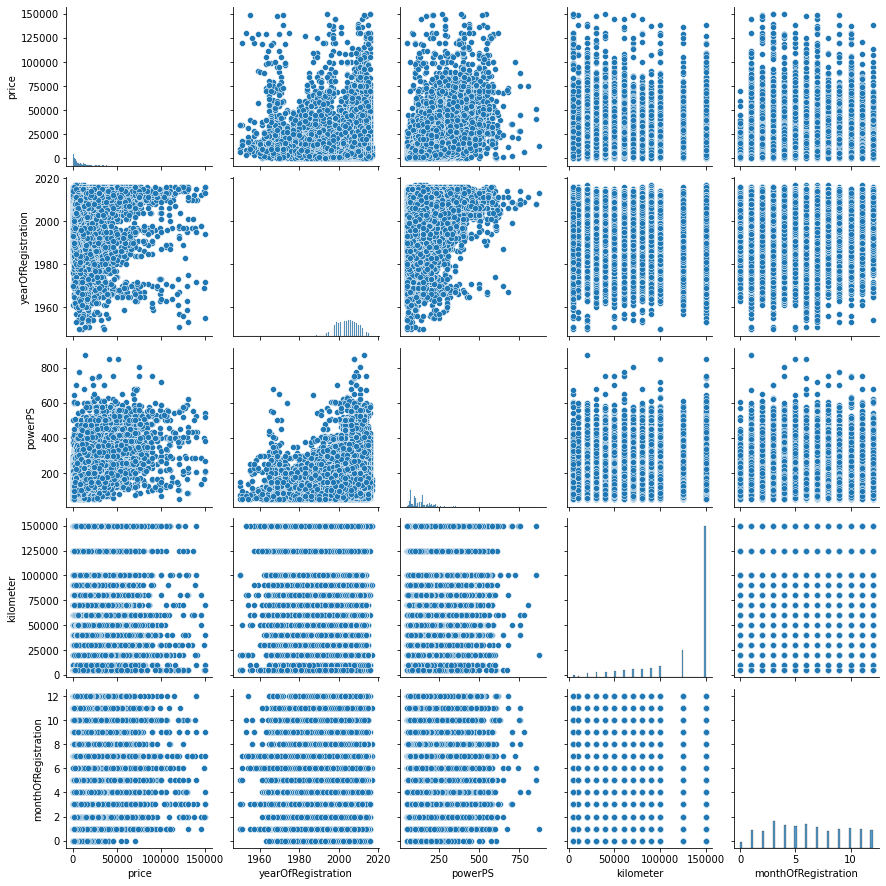

In [32]:
sns.pairplot(final_df)

<AxesSubplot:xlabel='fuelType', ylabel='price'>

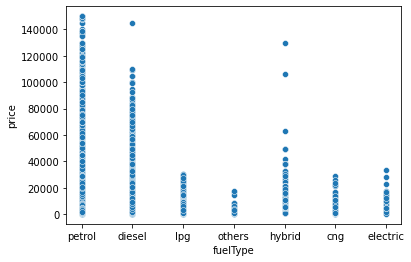

In [33]:
sns.scatterplot(final_df.fuelType,final_df.price)

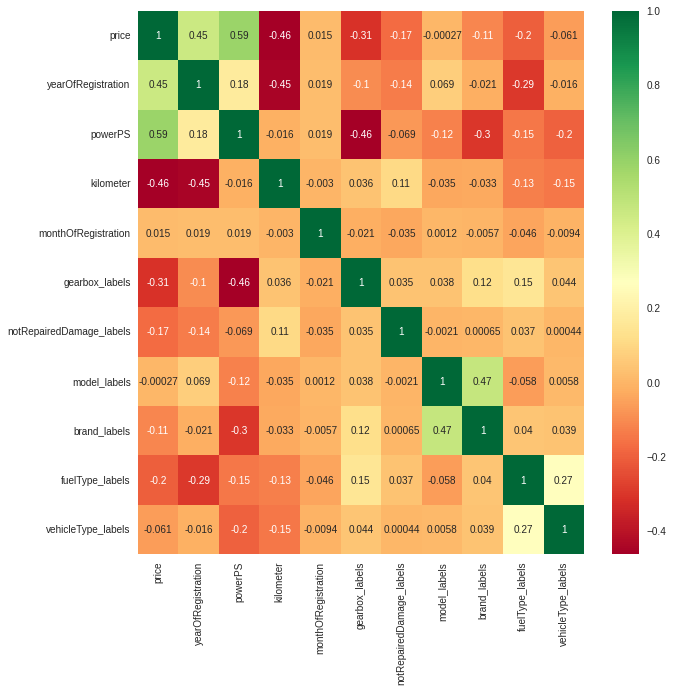

In [126]:
corrmat = final_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

g=sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

LABEL ENCODING THE DATA

In [35]:
labels = ['gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']

columnMapper = {}
for i in labels:
    columnMapper[i]=LabelEncoder()
    columnMapper[i].fit(final_df[i])
    tr = columnMapper[i].transform(final_df[i])
    np.save(str('classes'+i+ '.npy'), columnMapper[i].classes_)
    print(i, ":",columnMapper[i])
    final_df.loc[:, i + '_labels'] = pd.Series (tr, index=final_df.index)

gearbox : LabelEncoder()
notRepairedDamage : LabelEncoder()
model : LabelEncoder()
brand : LabelEncoder()
fuelType : LabelEncoder()
vehicleType : LabelEncoder()


In [36]:
labeled_final_df = final_df[ ['price'
                 ,'yearOfRegistration'
                 ,'powerPS'
                 ,'kilometer'
                 ,'monthOfRegistration'
                ]
               + [x+"_labels" for x in labels]]

In [37]:
labeled_final_df.columns

Index(['price', 'yearOfRegistration', 'powerPS', 'kilometer',
       'monthOfRegistration', 'gearbox_labels', 'notRepairedDamage_labels',
       'model_labels', 'brand_labels', 'fuelType_labels',
       'vehicleType_labels'],
      dtype='object')

SPLITTING DATA INTO DEPENDENT AND INDEPENDENT VARIABLES

In [38]:
Y = labeled_final_df.iloc[:,0].values
X = labeled_final_df.iloc[:,1:].values
Y=Y.reshape(-1,1)

In [39]:
from sklearn.model_selection import cross_val_score, train_test_split


X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [115]:
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score

In [118]:
def find_scores(y_test, y_pred, X_train):
    scores = dict()
    mae = MAE(y_test, y_pred)
    mse = MSE(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmsle = np.log(rmse)
    r2 = r2_score(y_test, y_pred)
    n, k = X_train.shape
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    
    scores['Mean Absolute Error']=mae
    scores['Mean Squared Error']=mse
    scores['Root Mean Squared Error']=rmse
    scores['Root Mean Squared Logaritmic Error ']=rmsle
    scores['r2_score']=r2
    scores['adj_r2_score']=adj_r2_score
    
    return scores

IMPORTING THE XGB REGRESSOR AND RANDOM FOREST REGRESSOR METHODS 

In [95]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [98]:
xgb_model = XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=123, reg_alpha=0)

In [99]:
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=123, reg_alpha=0, ...)

In [103]:
xgb_filename = 'final_xgb_model.sav'

# pickle.dump(xgb_model, open(xgb_filename, 'wb'))

loaded_xgb_model = pickle.load(open(xgb_filename,'rb'))

In [104]:
xgb_pred = loaded_xgb_model.predict(x_test)

In [119]:
find_scores(y_test, xgb_pred, X_train)

{'Mean Absolute Error': 1350.6691992593705,
 'Mean Squared Error': 8428897.222035887,
 'Root Mean Squared Error': 2903.2563135272585,
 'Root Mean Squared Logaritmic Error ': 7.9735882527647695,
 'r2_score': 0.8831045298604734,
 'adj_r2_score': 0.8830974717650774}

In [107]:
rf_model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [ ]:
rf_filename = 'final_rf_model.sav'

# pickle.dump(rf_model, open(rf_filename, 'wb'))

loaded_rf_model = pickle.load(open(rf_filename,'rb'))

In [108]:
rf_model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [109]:
rf_pred = rf_model.predict(x_test)

In [120]:
find_scores(y_test, rf_pred, X_train)

{'Mean Absolute Error': 1359.7906999332038,
 'Mean Squared Error': 9167363.283560084,
 'Root Mean Squared Error': 3027.765394405598,
 'Root Mean Squared Logaritmic Error ': 8.01558013282572,
 'r2_score': 0.8728631738242083,
 'adj_r2_score': 0.8728554973603861}

Finalized Model :  xgboost Regressor

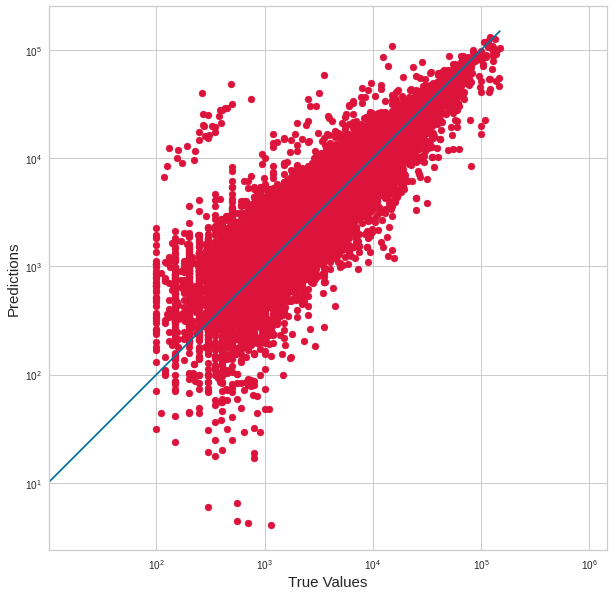

In [125]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, xgb_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(xgb_pred), max(y_test))
p2 = min(min(xgb_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()